# Dataset Chosen: German Traffic Sign Recognition Benchmark

Reason for choosing dataset: The GTSRB dataset is ideal for training and evaluating models for traffic sign recognition tasks, making it suitable for deep learning and computer vision applications.

# Dataset Information

The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011.

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

# Real-World Problem Being Solved

### Traffic Sign Recognition for Road Safety:
The real-world problem being addressed is the accurate recognition of traffic signs, which is critical for autonomous vehicles and advanced driver-assistance systems (ADAS). Misinterpreted or unrecognised traffic signs can lead to accidents or inefficiencies in transportation. By leveraging the GTSRB dataset, my project aims to train a model that can reliably identify traffic signs in various conditions, contributing to safer and more efficient roadways.

# Installation of deeplake for importing of dataset from an external API

In [5]:
pip install "deeplake<4"

Note: you may need to restart the kernel to use updated packages.


# Loading GTSRB Dataset
Loads the training and testing subsets of the GTSRB dataset using the Deep Lake library.

- `deeplake.load("hub://activeloop/gtsrb-train"): Loads the training dataset.`
- `deeplake.load("hub://activeloop/gtsrb-test"): Loads the testing dataset.`

In [7]:
import deeplake

# Load training and testing subsets
train_ds = deeplake.load("hub://activeloop/gtsrb-train")
test_ds = deeplake.load("hub://activeloop/gtsrb-test")

C:\Users\User\anaconda3\lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (4.1.3) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(
\

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/gtsrb-train



/

hub://activeloop/gtsrb-train loaded successfully.



-

Opening dataset in read-only mode as you don't have write permissions.


|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/gtsrb-test



\

hub://activeloop/gtsrb-test loaded successfully.



# High-Resolution Image Visualization
Extracts one high-resolution image per label from the GTSRB dataset and visualizes them for help with label mapping.

- Filters images above a resolution threshold (100x100).
- Stores one image per label (43 labels total).
- Displays the images in a grid with labels for easy visualization and understanding.

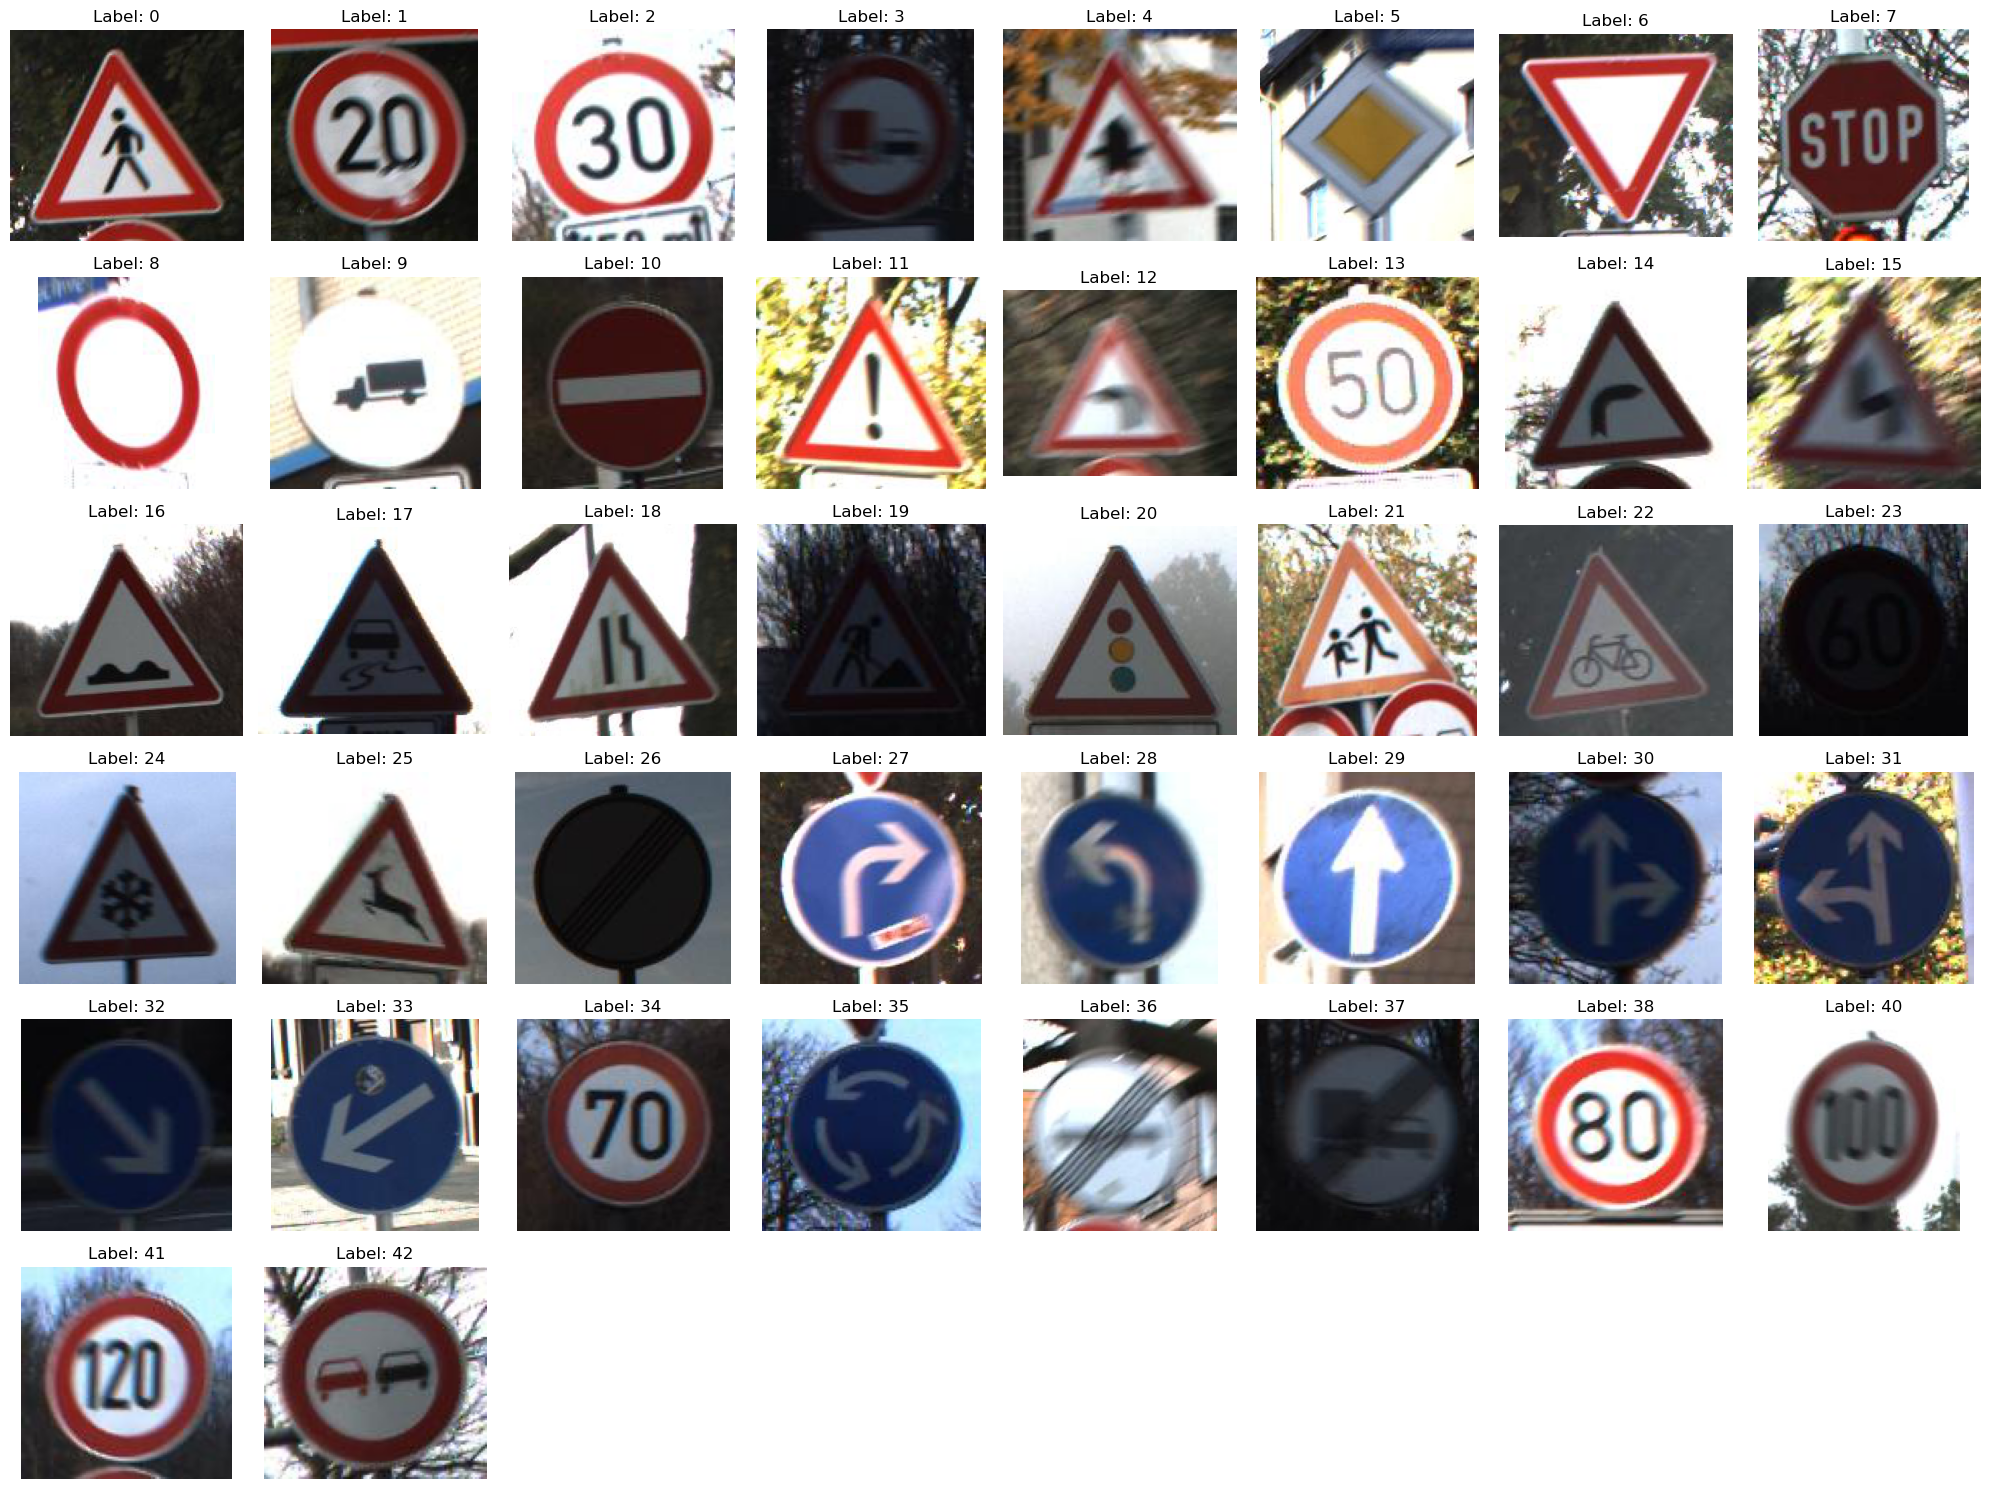

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Dictionary to store one high-resolution image for each label
high_res_images_per_label = {}

# Define resolution threshold
resolution_threshold = 100  # Minimum width and height

# Loop through the dataset to collect high-resolution images for each label
for sample in train_ds:
    label = sample['labels'].numpy().item()  # Convert to scalar
    image = sample['images'].numpy()
    height, width, _ = image.shape

    # Check if the image meets the resolution threshold
    if height > resolution_threshold and width > resolution_threshold:
        if label not in high_res_images_per_label:  # Add only one image per label
            high_res_images_per_label[label] = image
        if len(high_res_images_per_label) == 43:  # Stop once all 43 labels are covered
            break

# Sort high_res_images_per_label by label
sorted_high_res_images_per_label = dict(sorted(high_res_images_per_label.items()))

# Plot one high-resolution image per label in ascending order
fig, axes = plt.subplots(6, 8, figsize=(20, 15))  # Adjust grid size for 43 labels
axes = axes.flat

for ax, (label, image) in zip(axes, sorted_high_res_images_per_label.items()):
    ax.imshow(image)
    ax.set_title(f"Label: {label}")  # Show raw label number
    ax.axis('off')

# Hide any remaining unused subplots (if there are less than 43 valid images)
for ax in axes[len(sorted_high_res_images_per_label):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


# Visualisation of image in Label 39
Since the images in the previous code snippet did not capture label 39, the code below is used to visualize that image separately

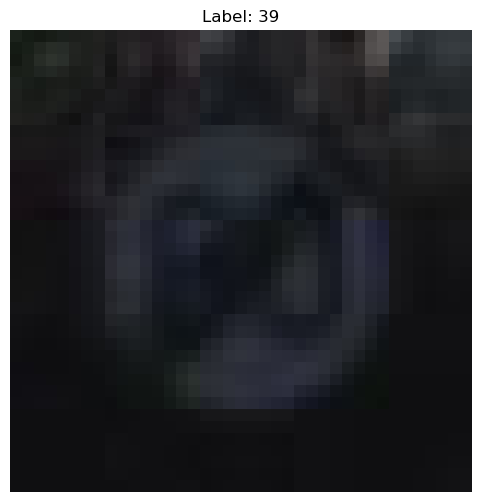

In [11]:
# Find and display the image for label 39
label_to_display = 39
image_for_label = None

# Loop through the dataset to find the image with label 39
for sample in train_ds:
    label = sample['labels'].numpy().item()  # Convert to scalar
    if label == label_to_display:
        image_for_label = sample['images'].numpy()
        break  # Stop once the label is found

# Display the image if found
if image_for_label is not None:
    plt.figure(figsize=(6, 6))
    plt.imshow(image_for_label)
    plt.title(f"Label: {label_to_display}")
    plt.axis('off')
    plt.show()
else:
    print(f"Label {label_to_display} not found in the dataset.")

# Visualizing Class Distribution in GTSRB Dataset
Analyze and visualize the distribution of traffic sign classes in the training dataset.

- Label Mapping: Defines the 43 class labels with descriptive names.
- Count Labels: Uses Counter to calculate the frequency of each label in the dataset.
- Convert to Names: Maps label indices to their respective names for better interpretability.
- Visualization: Plots a bar chart to display the class distribution, with labels rotated for readability.

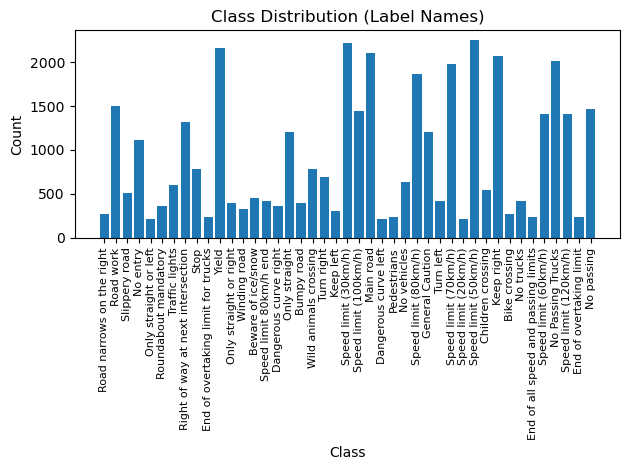

In [13]:
from collections import Counter

# Define the label mapping (mames of the 43 classes)
label_mapping = {
    0: "Pedestrians",
    1: "Speed limit (20km/h)",
    2: "Speed limit (30km/h)",
    3: "No Passing Trucks",
    4: "Right of way at next intersection",
    5: "Main road",
    6: "Yield",
    7: "Stop",
    8: "No vehicles",
    9: "No trucks",
    10: "No entry",
    11: "General Caution",
    12: "Dangerous curve left",
    13: "Speed limit (50km/h)",
    14: "Dangerous curve right",
    15: "Winding road",
    16: "Bumpy road",
    17: "Slippery road",
    18: "Road narrows on the right",
    19: "Road work",
    20: "Traffic lights",
    21: "Children crossing",
    22: "Bike crossing",
    23: "Speed limit (60km/h)",
    24: "Beware of ice/snow",
    25: "Wild animals crossing",
    26: "End of all speed and passing limits",
    27: "Turn right",
    28: "Turn left",
    29: "Only straight",
    30: "Only straight or right",
    31: "Only straight or left",
    32: "Keep right",
    33: "Keep left",
    34: "Speed limit (70km/h)",
    35: "Roundabout mandatory",
    36: "End of overtaking limit",
    37: "End of overtaking limit for trucks",
    38: "Speed limit (80km/h)",
    39: "Speed limit 80km/h end",
    40: "Speed limit (100km/h)",
    41: "Speed limit (120km/h)",
    42: "No passing"
}

# Retrieve all labels and count occurrences
label_counts = Counter(sample['labels'].numpy().item() for sample in train_ds)

# Convert label indices to their names
label_names = {idx: label_mapping[idx] for idx in label_counts.keys()}
label_counts_named = {label_names[idx]: count for idx, count in label_counts.items()}

# Plot class distribution with the label names
plt.bar(label_counts_named.keys(), label_counts_named.values())
plt.xticks(rotation=90, fontsize=8)  # Rotate and adjust label size
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution (Label Names)")
plt.tight_layout()
plt.show()


# Visualizing Example Images from Each Traffic Sign Category
Extracts and visualizes one example image for each category in the GTSRB dataset after finishing label mapping

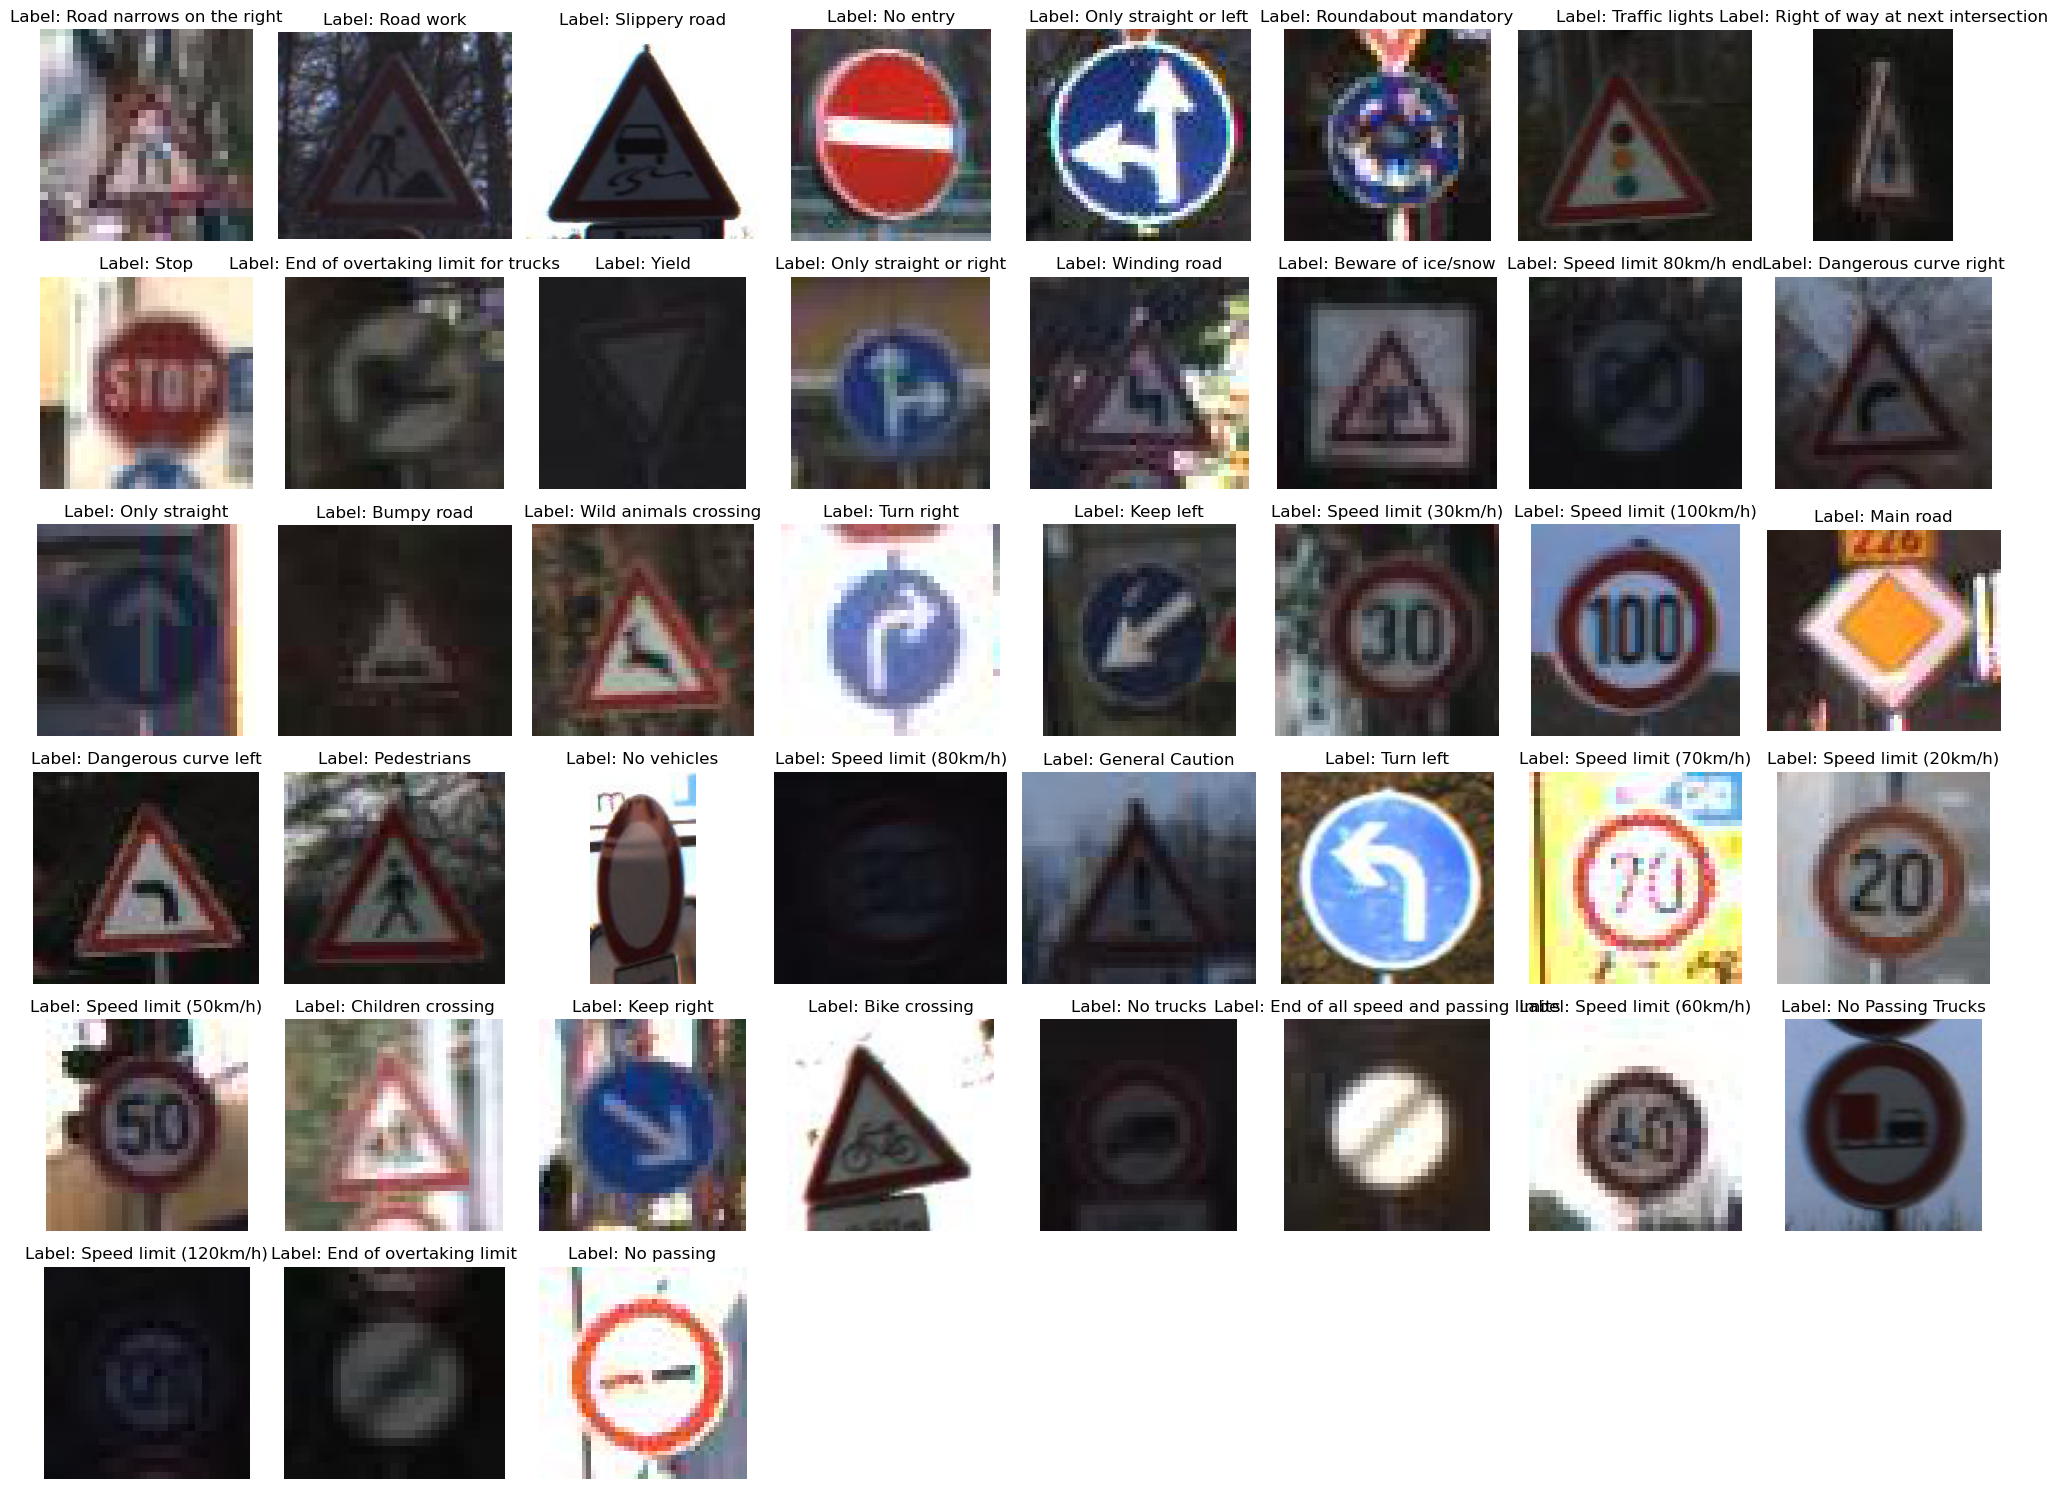

In [15]:
# Dictionary to store one example image per category
category_images = {}

# Loop through the dataset to find one image for each category
for sample in train_ds:
    label = sample['labels'].numpy().item()
    if label not in category_images:  # Add only one image per category
        category_images[label] = sample['images'].numpy()
    if len(category_images) == len(label_mapping):  # Stop if all categories are covered
        break

# Visualize one image from each category
fig, axes = plt.subplots(6, 8, figsize=(20, 15))  # Adjust grid size for 43 categories
axes = axes.flat

for ax, (label, image) in zip(axes, category_images.items()):
    label_name = label_mapping[label]
    ax.imshow(image)
    ax.set_title(f"Label: {label_name}")
    ax.axis('off')

# Hide any remaining unused subplots
for ax in axes[len(category_images):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


# Analyzing Image Aspect Ratios in the GTSRB Dataset
To identify unique image dimensions and visualize the distribution of aspect ratios (height-to-width) in the training dataset, providing insights about the dataset consistency.

C:\Users\User\anaconda3\lib\site-packages\deeplake\core\dataset\dataset.py:642: UserWarning: Indexing by integer in a for loop, like `for i in range(len(ds)): ... ds[i]` can be quite slow. Use `for i, sample in enumerate(ds)` instead.
  warnings.warn(


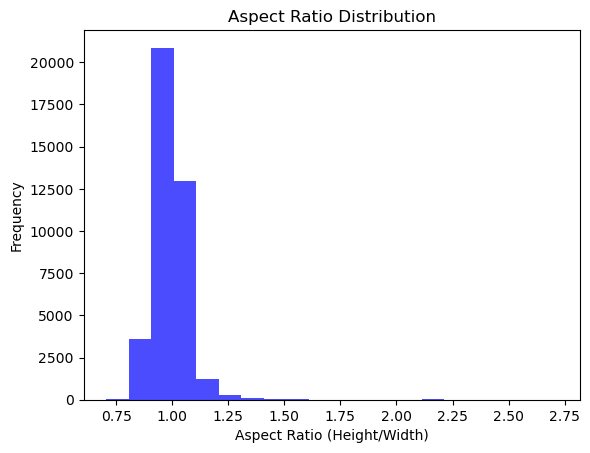

In [17]:
# Analyze image dimensions
image_shapes = [train_ds[i]['images'].numpy().shape[:2] for i in range(len(train_ds))]
unique_shapes = set(image_shapes)

# Calculate aspect ratios
aspect_ratios = [h / w for h, w in image_shapes]

# Plot aspect ratio distribution
plt.hist(aspect_ratios, bins=20, color='blue', alpha=0.7)
plt.title("Aspect Ratio Distribution")
plt.xlabel("Aspect Ratio (Height/Width)")
plt.ylabel("Frequency")
plt.show()


# Comparing Training and Testing Label Distributions
To compare the label distributions between the training and testing datasets, ensuring balance and consistency in the class representation for reliable deep learning model training.

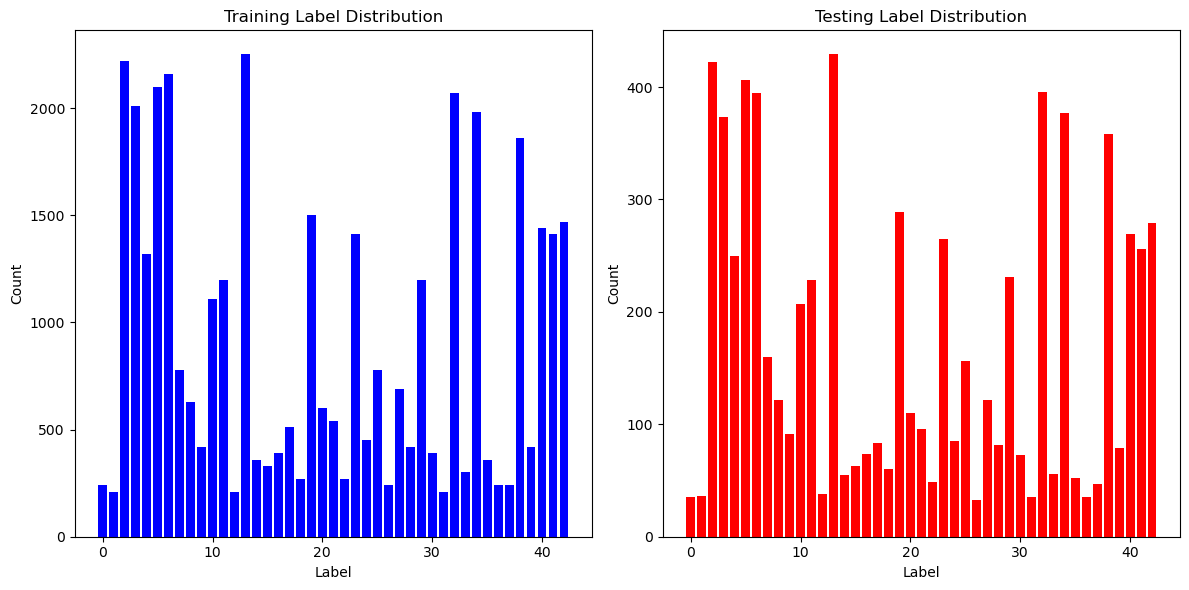

In [19]:
# Compare train and test label distributions
test_labels = [sample['labels'].numpy().item() for sample in test_ds]
test_label_counts = Counter(test_labels)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Train distribution
axes[0].bar(label_counts.keys(), label_counts.values(), color='blue')
axes[0].set_title("Training Label Distribution")
axes[0].set_xlabel("Label")
axes[0].set_ylabel("Count")

# Test distribution
axes[1].bar(test_label_counts.keys(), test_label_counts.values(), color='red')
axes[1].set_title("Testing Label Distribution")
axes[1].set_xlabel("Label")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Exploring Feature Correlations in the GTSRB Dataset
To analyze relationships between image features (label, width, height, pixel mean) in the training dataset using a correlation matrix, and visualize it to identify patterns.

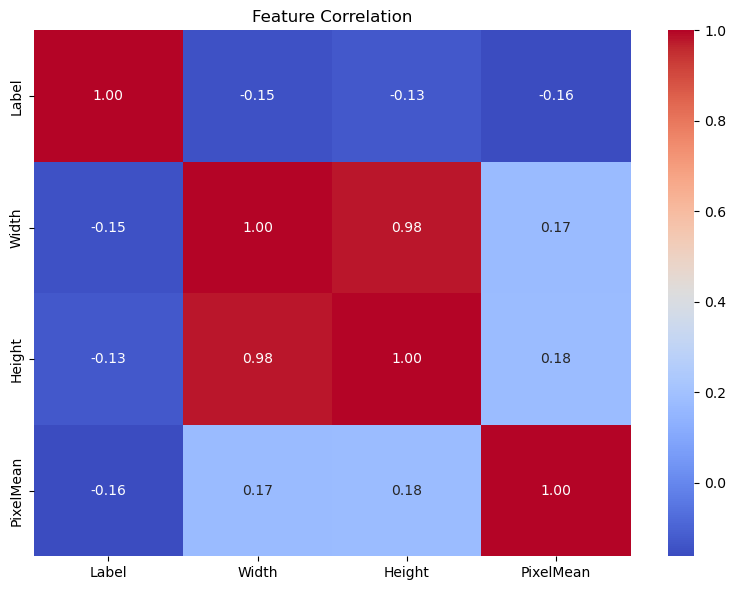

In [21]:
import pandas as pd
import seaborn as sns  # Import Seaborn for visualization

# Create a dataframe with additional features
df = pd.DataFrame({
    'Label': [sample['labels'].numpy().item() for sample in train_ds],
    'Width': [sample['images'].numpy().shape[1] for sample in train_ds],
    'Height': [sample['images'].numpy().shape[0] for sample in train_ds],
    'PixelMean': [sample['images'].numpy().mean() for sample in train_ds]
})

# Compute correlation
correlation_matrix = df.corr()

# Visualize correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation")
plt.tight_layout()
plt.show()


# Preprocessing GTSRB Dataset for Deep Learning model training

To preprocess the GTSRB dataset by resizing images to a uniform size (32x32 pixels) and converting them, along with their labels, into NumPy arrays for efficient use in machine learning models.

In [23]:
from PIL import Image

# Resize function
def resize_image(image, size=(32, 32)):
    img = Image.fromarray(image)
    img = img.resize(size)
    return np.array(img)

# Convert training data to NumPy arrays
x_train = np.array([resize_image(sample['images'].numpy()) for sample in train_ds])
y_train = np.array([sample['labels'].numpy() for sample in train_ds])

# Convert testing data to NumPy arrays
x_test = np.array([resize_image(sample['images'].numpy()) for sample in test_ds])
y_test = np.array([sample['labels'].numpy() for sample in test_ds])

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


x_train shape: (39209, 32, 32, 3), y_train shape: (39209, 1)
x_test shape: (7357, 32, 32, 3), y_test shape: (7357, 1)


# Identifying Duplicate Images in the Dataset
To identify and analyze duplicate images in the training and testing datasets by computing and comparing image hashes. This helps ensure data integrity and prevents redundancy that could skew model training.

In [25]:
import hashlib
from collections import defaultdict

# Function to compute hash of an image
def compute_image_hash(image):
    """
    Compute a hash for the image using hashlib.
    Convert the image array to bytes and hash it.
    """
    return hashlib.md5(image.tobytes()).hexdigest()

# Find duplicates in a dataset
def find_duplicates(images):
    """
    Find duplicates in a dataset by comparing image hashes.
    :param images: Numpy array of images
    :return: Dictionary where keys are image hashes, and values are lists of indices
    """
    hash_dict = defaultdict(list)
    for idx, image in enumerate(images):
        img_hash = compute_image_hash(image)
        hash_dict[img_hash].append(idx)
    # Filter out hashes with more than one index (duplicates)
    duplicates = {key: indices for key, indices in hash_dict.items() if len(indices) > 1}
    return duplicates

# Check duplicates in training and testing datasets
train_duplicates = find_duplicates(x_train)
test_duplicates = find_duplicates(x_test)

# Print duplicate information
print(f"Training duplicates: {train_duplicates}")
print(f"Testing duplicates: {test_duplicates}")

# Visualize duplicates if there are any found
if train_duplicates:
    for img_hash, indices in train_duplicates.items():
        print(f"Duplicate training images for hash {img_hash}: {indices}")
        for idx in indices:
            Image.fromarray(x_train[idx]).show()  # Display the images


Training duplicates: {}
Testing duplicates: {}


# Verifying Dataset Shapes
To confirm the dimensions of the preprocessed training and testing datasets `(x_train, y_train, x_test, y_test)` and ensure they align with the expected input-output structure for the deep learning model.

In [27]:
# Check the shapes of the resulting datasets
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (39209, 32, 32, 3), y_train shape: (39209, 1)
x_test shape: (7357, 32, 32, 3), y_test shape: (7357, 1)


In [28]:
# Check the training and testing shapes of the resulting datasets
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (39209, 32, 32, 3)
Testing data shape: (7357, 32, 32, 3)


In [29]:
# Check the total number of classes
print("Number of classes:", len(set(y_train.flatten())))

Number of classes: 43


In [30]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(39209, 32, 32, 3)
(39209, 1)
(7357, 32, 32, 3)
(7357, 1)


# Preparing Dataset for Convolutional Neural Networks (CNNs)
To reshape the training and testing datasets to include a channel dimension `(32, 32, 3)` for compatibility with CNN models and define the input shape required for the neural network.

In [32]:
# Define image dimensions
img_rows, img_cols = 32, 32

# Reshape training and testing data to ensure compatibility with CNNs
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)

# Define input shape for the CNN
input_shape = (img_rows, img_cols, 3)

# Verify the shapes
print("Training data shape after reshaping:", x_train.shape)
print("Testing data shape after reshaping:", x_test.shape)
print("Input shape for CNN:", input_shape)

Training data shape after reshaping: (39209, 32, 32, 3)
Testing data shape after reshaping: (7357, 32, 32, 3)
Input shape for CNN: (32, 32, 3)


# Data Normalization and Label Encoding for the model training
To prepare the dataset for training by normalizing image pixel values to the range `[0, 1]` for efficient learning and one-hot encoding the labels into a categorical format compatible with deep learning models.

In [34]:
from tensorflow.keras.utils import to_categorical

# The total number of classes is 43 for GTSRB
num_classes = 43

# Ensure the data type is float value and not an integer
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the pixel values to the range [0, 1]
x_train /= 255
x_test /= 255

# Print dataset details
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# One-hot encode the labels for GTSRB
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train shape: (39209, 32, 32, 3)
39209 train samples
7357 test samples


# Data Augmentation for GTSRB Dataset
To enhance the diversity of the training dataset by applying real-time data augmentation techniques such as rotation, zoom, shifts, flips, and brightness adjustments, improving the model's performance and generalization to unseen data.

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.4,  # Randomly zoom image
    width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    brightness_range=[0.7, 1.3], # adjusts the brightness of the image from an range of 0.7 to 1.3
    shear_range=0.3
)
datagen.fit(x_train)

# Visualizing Augmented Images
To display augmented versions of randomly selected images from the training dataset, showcasing the effects of data augmentation techniques such as rotation, zoom, shifts and birhgtness changes on the dataset.

C:\Users\User\anaconda3\lib\site-packages\deeplake\core\dataset\dataset.py:642: UserWarning: Indexing by integer in a for loop, like `for i in range(len(ds)): ... ds[i]` can be quite slow. Use `for i, sample in enumerate(ds)` instead.
  warnings.warn(


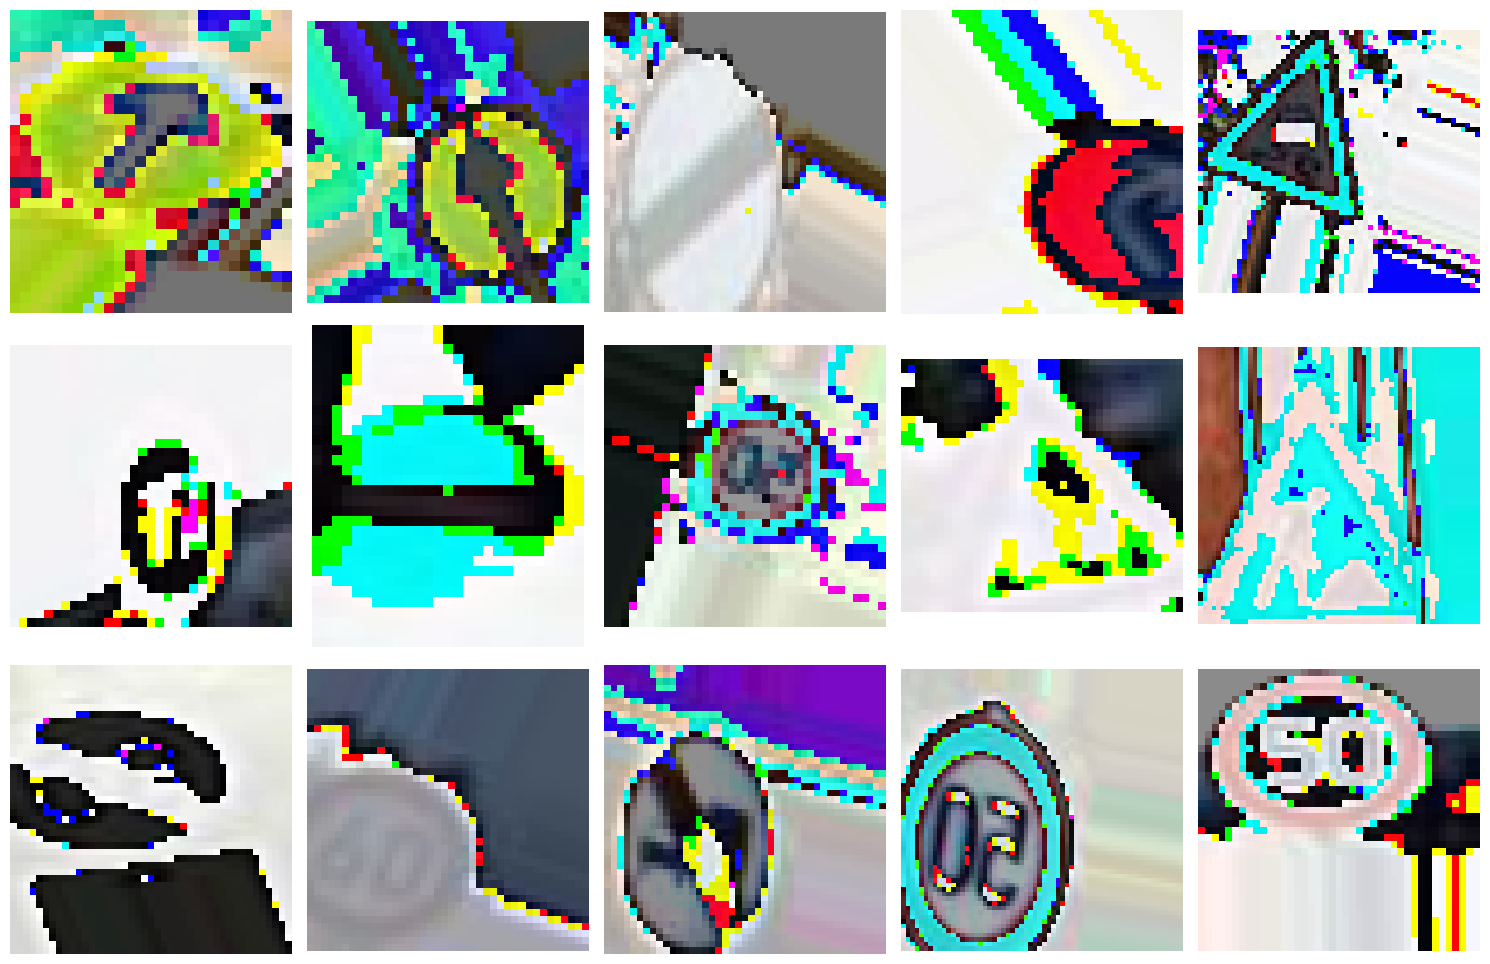

In [38]:
import random  # Import the random module

# Visualize augmented images from random samples
fig, axes = plt.subplots(3, 5, figsize=(15, 10))  # 3 rows, 5 columns
for ax in axes.flat:
    idx = random.randint(0, len(train_ds) - 1)  # Pick a random image
    sample_image = train_ds[idx]['images'].numpy()
    sample_image = np.expand_dims(sample_image, axis=0)  # Expand dimensions for datagen

    # Generate an augmented image
    augmented_image = next(datagen.flow(sample_image, batch_size=1))[0].astype('uint8')
    ax.imshow(augmented_image)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Title: Building a Convolutional Neural Network (CNN) for Traffic Sign Classification
To construct a CNN model for classifying 43 traffic sign categories in the GTSRB dataset. The architecture is designed to extract features, reduce dimensionality, and classify traffic signs efficiently.

Model Architecture:
1. Convolutional Layers:
- Three Conv2D layers with increasing filters (32, 64, 128) and ReLU activation to extract spatial features.
Padding is set to 'same' to preserve input dimensions.

2. Pooling Layers:
- MaxPooling2D layers with a pool size of (2, 2) after each convolutional layer to reduce spatial dimensions and computational complexity.

3. Fully Connected Layers:
- A Flatten layer to convert 3D feature maps to 1D vectors.
- A dense layer with 128 neurons and ReLU activation for learning high-level representations.
- A Dropout layer with a 50% dropout rate to prevent overfitting.

4. Output Layer:
- A dense layer with 43 neurons (corresponding to the number of classes) and a softmax activation function for multi-class probability predictions.

In [40]:
# Required imports for building a Convolutional Neural Network (CNN)
from tensorflow.keras.models import Sequential  # Sequential model for stacking layers linearly
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation  # Layers for the CNN

# Building the CNN model
model = Sequential()  # Initialize a Sequential model

# First convolutional block
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same'))  # Add a convolutional layer with 32 filters, 3x3 kernel size, and same padding
model.add(Activation('relu'))  # Apply ReLU activation to introduce non-linearity
model.add(MaxPooling2D(pool_size=(2, 2)))  # Add a max-pooling layer to down-sample the feature maps

# Second convolutional block
model.add(Conv2D(64, (3, 3), padding='same'))  # Add a convolutional layer with 64 filters and same padding
model.add(Activation('relu'))  # Apply ReLU activation
model.add(MaxPooling2D(pool_size=(2, 2)))  # Down-sample the feature maps further

# Third convolutional block
model.add(Conv2D(128, (3, 3), padding='same'))  # Add a convolutional layer with 128 filters and same padding
model.add(Activation('relu'))  # Apply ReLU activation
model.add(MaxPooling2D(pool_size=(2, 2)))  # Further down-sample the feature maps

# Flatten the feature maps to a 1D vector
model.add(Flatten())  # Converts the 3D feature maps into 1D feature vectors for the dense layers

# Fully connected layer
model.add(Dense(128))  # Add a dense layer with 128 neurons
model.add(Activation('relu'))  # Apply ReLU activation for non-linearity
model.add(Dropout(0.5))  # Add dropout to prevent overfitting by randomly dropping 50% of the neurons during training

# Output layer
model.add(Dense(43))  # Add a dense layer with 43 neurons (one for each class in the classification task)
model.add(Activation('softmax'))  # Apply softmax activation to get class probabilities as output

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

# Compiling the CNN Model
To configure the CNN model for training.

- Optimizer used: `Adam`
- Loss function used: `Categorical Crossentropy` due to multi-class classification
- Metrics used: `Accuracy`

In [43]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [44]:
batch_size = 64
num_classes = 43
epochs = 5

# Training the CNN with Early Stopping
Train the CNN model while using early stopping to halt training after 3 epochs without validation accuracy improvement and restore the best weights.

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

model_log = model.fit(x_train, y_train,
                      batch_size=batch_size, # number of samples to be used for each gradient update
                      epochs=epochs, # number of iterations over the entire x_train data
                      validation_data=(x_test, y_test), # Validation data to evaluate the model's performance during training
                      callbacks=[early_stopping]
                     )

Epoch 1/5
613/613 [==============================] - 5s 6ms/step - loss: 1.9906 - accuracy: 0.4395 - val_loss: 0.7304 - val_accuracy: 0.7904
Epoch 2/5
613/613 [==============================] - 3s 5ms/step - loss: 0.4887 - accuracy: 0.8436 - val_loss: 0.3176 - val_accuracy: 0.9072
Epoch 3/5
613/613 [==============================] - 3s 5ms/step - loss: 0.2447 - accuracy: 0.9228 - val_loss: 0.2687 - val_accuracy: 0.9270
Epoch 4/5
613/613 [==============================] - 3s 5ms/step - loss: 0.1619 - accuracy: 0.9480 - val_loss: 0.2290 - val_accuracy: 0.9372
Epoch 5/5
613/613 [==============================] - 3s 5ms/step - loss: 0.1254 - accuracy: 0.9591 - val_loss: 0.2417 - val_accuracy: 0.9451


# Plotting Training and Validation Accuracy
Visualize the model's training and validation accuracy across epochs to see the model performance and identify trends during training.

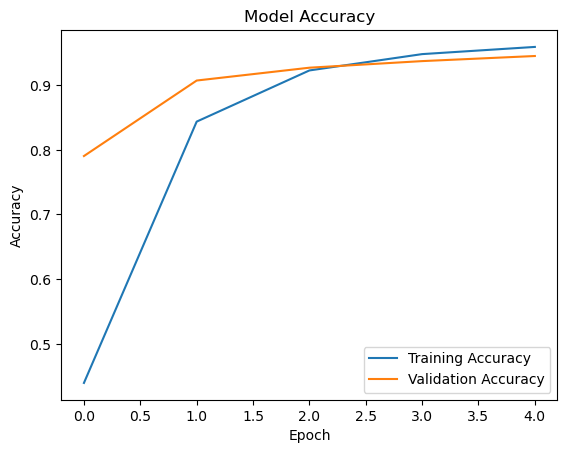

In [48]:
# Plor Learniing curve for training accuracy vs testing accuracy
plt.plot(model_log.history['accuracy'], label='Training Accuracy')
plt.plot(model_log.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting Training and Validation Loss
Visualize the model's training and validation loss over epochs to assess convergence and see if there is overfitting during training.

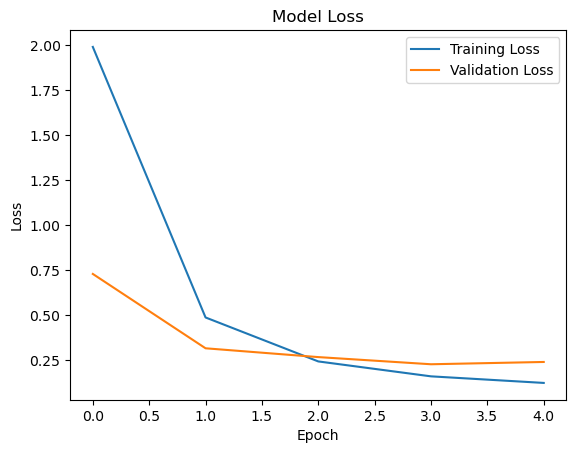

In [50]:
# Plot learning curve for training loss compared to validation loss
plt.plot(model_log.history['loss'], label='Training Loss')
plt.plot(model_log.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualizing Misclassified Images
To identify and display misclassified images from the test dataset, along with their true and predicted labels, for better understanding and analysis of model performance.

230/230 [==============================] - 1s 2ms/step


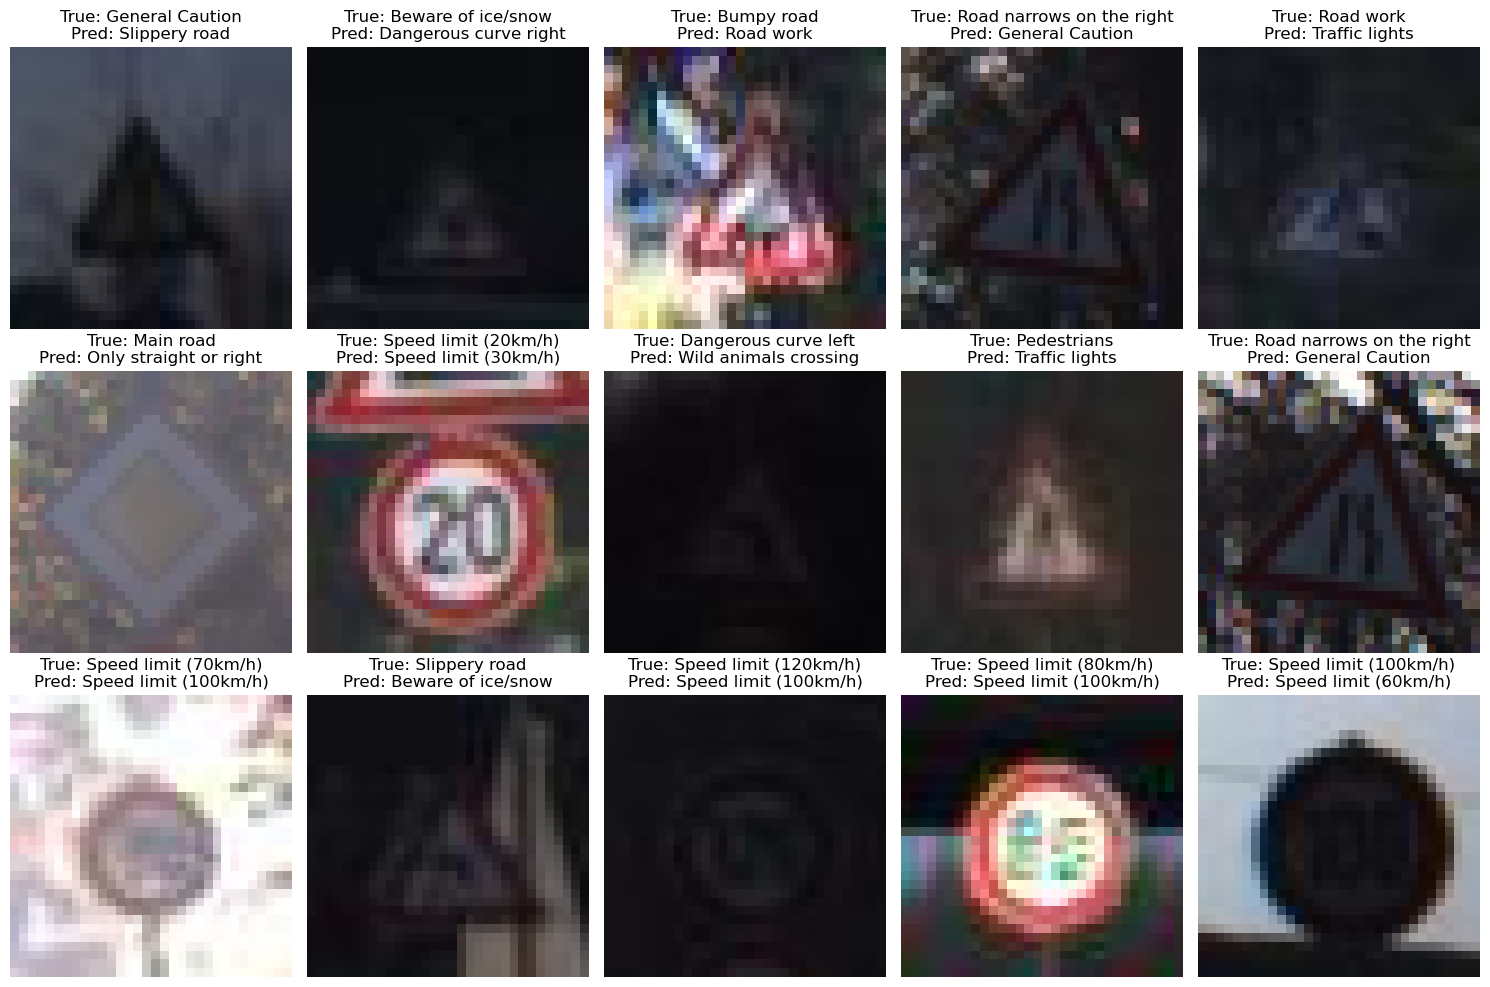

In [52]:
# Predict the class probabilities for the test data and select the class with the highest probability for each sample
y_pred = np.argmax(model.predict(x_test), axis=1)

# Convert one-hot encoded true labels to class indices
y_true = np.argmax(y_test, axis=1)

# Identify indices where the predicted labels do not match the true labels
misclassified_indices = [i for i in range(len(y_test)) if y_pred[i] != y_true[i]]

# Plot the misclassified images to analyze the model's performance visually
fig, axes = plt.subplots(3, 5, figsize=(15, 10))  # Create a grid of subplots (3 rows, 5 columns)

# Loop through the misclassified images and display them
for i, ax in enumerate(axes.flat):  # Iterate over the grid's subplots
    if i < len(misclassified_indices):  # Ensure we only plot available misclassified images
        idx = misclassified_indices[i]  # Get the index of the misclassified image
        ax.imshow(x_test[idx])  # Display the image from the test set
        
        # Retrieve and display the true and predicted labels as class names
        true_label_name = label_mapping[y_true[idx]]  # Map the true label index to its class name
        pred_label_name = label_mapping[y_pred[idx]]  # Map the predicted label index to its class name
        ax.set_title(f"True: {true_label_name}\nPred: {pred_label_name}")  # Set subplot title
        ax.axis('off')  # Hide the axis for better visualization
    else:
        ax.axis('off')  # Hide any unused subplots if there are fewer misclassified images than subplots

# Adjust spacing between subplots for better layout
plt.tight_layout()

# Display the figure
plt.show()

# Confusion Matrix for the Predicted Labels VS True Labels
To compute and visualize the confusion matrix for the first traffic sign categories in the GTSRB dataset, showing how well the model predicts these labels and identifying areas of confusion made by the deep learning model.

230/230 [==============================] - 0s 2ms/step


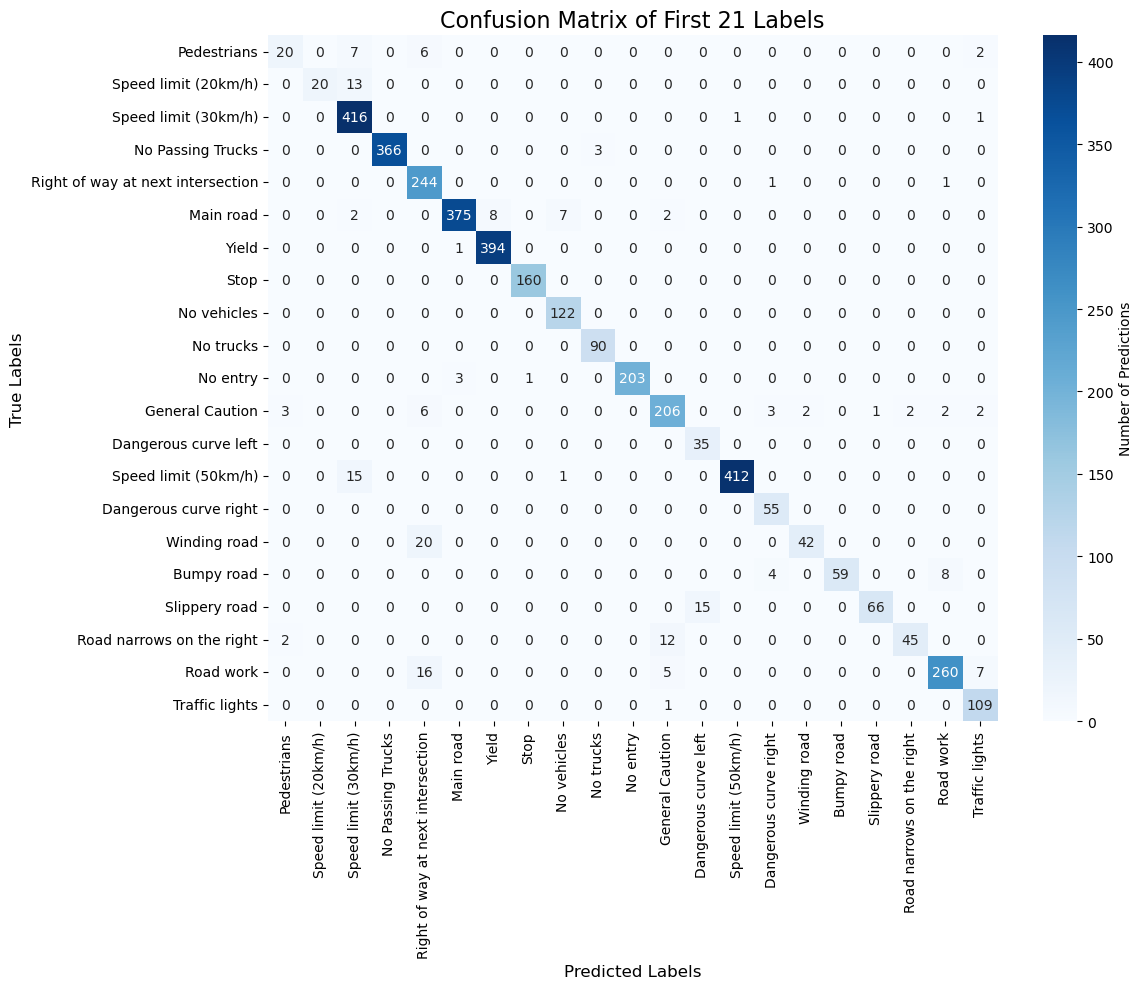

In [54]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(x_test), axis=1)  # Model predictions
y_true = np.argmax(y_test, axis=1)  # True labels (one-hot encoded)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Split confusion matrix into two parts for better readability
# First part: Labels 0-20
cm_part1 = cm[:21, :21]

# Plot the first part (labels 0-20)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_part1, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(label_mapping.values())[:21],
            yticklabels=list(label_mapping.values())[:21],
            cbar_kws={'label': 'Number of Predictions'})
plt.title('Confusion Matrix of First 21 Labels', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


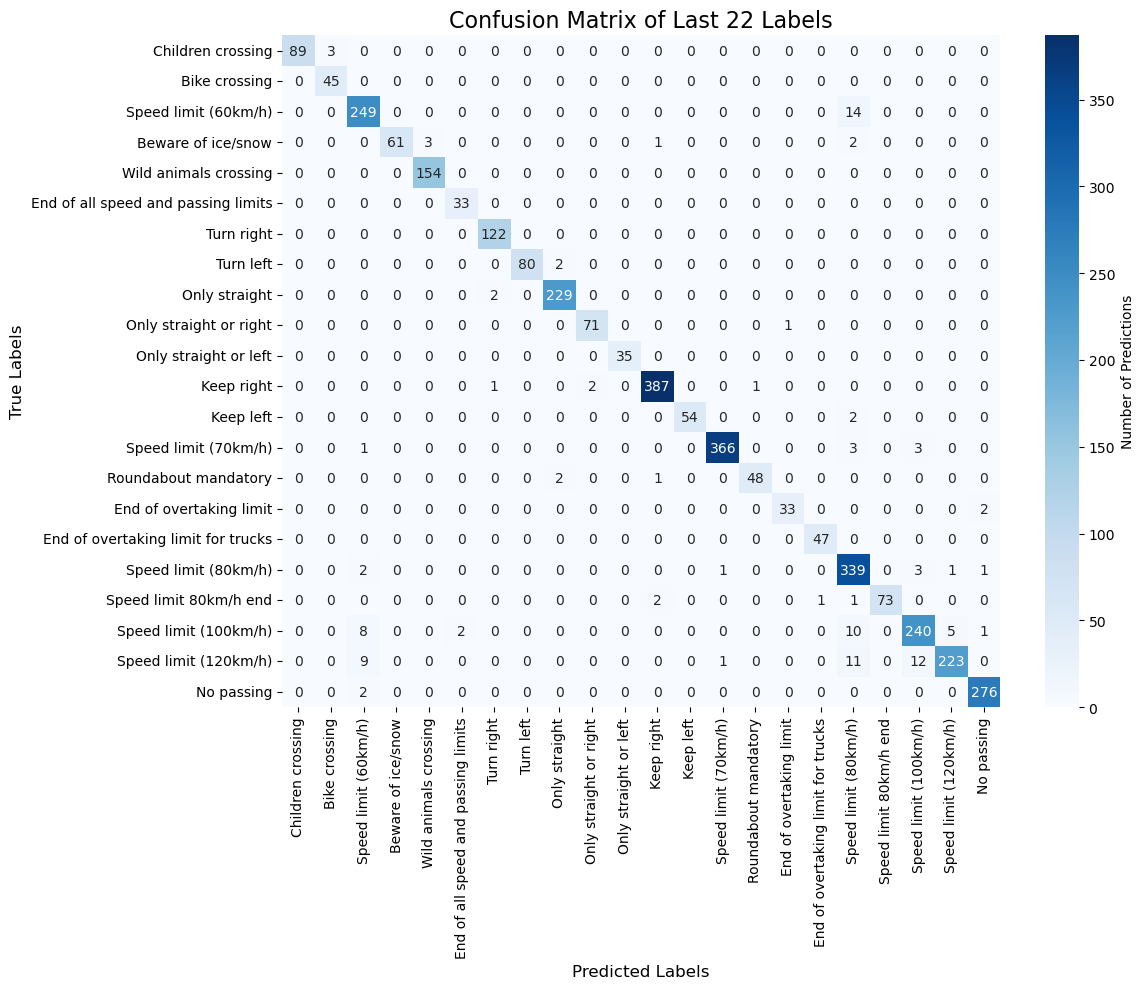

In [55]:
# Second part: Labels 21-42
cm_part2 = cm[21:, 21:]

# Plot the second part (labels 21-42)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_part2, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(label_mapping.values())[21:],
            yticklabels=list(label_mapping.values())[21:],
            cbar_kws={'label': 'Number of Predictions'})
plt.title('Confusion Matrix of Last 22 Labels', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Detailed Analysis of Model and Plans for Improvement


#### **What Was Done**

1. **Data Preparation**:
   - The images in the GTSRB dataset were resized to `32x32` pixels, ensuring uniformity in input size. This step reduces computational complexity and makes the data compatible with the CNN's input requirements.
   - Pixel values were normalized to the range `[0, 1]`, which improves the numerical stability of the training process. Normalization ensures faster convergence by preventing large gradients and helps the optimizer function more effectively.
   - Labels were one-hot encoded to transform class indices into binary matrices. This format allows the model to compute categorical crossentropy loss for multi-class classification effectively.

2. **Data Augmentation**:
   - Real-time data augmentation was applied to artificially increase the diversity of the training dataset. Techniques such as rotation, zoom, and brightness adjustments simulate real-world variations, such as slight misalignments, varying camera angles, and different lighting conditions. This helps the model generalize better and reduces overfitting.
   - Horizontal shifts, vertical shifts, and random flips further ensured that the model could recognize traffic signs regardless of minor positional variations in images.


3. **Model Architecture**:
   - The CNN model used a sequential design with three convolutional layers, each followed by a pooling layer. This feature extraction approach allows the model to learn simple features (edges, corners) in the early layers and more complex patterns (shapes, textures) in deeper layers.
   - A fully connected dense layer with 128 neurons gave the model the capacity to learn high-level representations of the data.
   - Dropout layers were included to reduce overfitting by randomly dropping connections during training, encouraging the deep learning neural network model to generalize better.

4. **Training**:
   - The Adam optimizer, known for its adaptability and efficiency, was used to minimize the categorical crossentropy loss. The optimizer adjusts learning rates dynamically during training, making it well-suited for deep learning tasks.
   - Early stopping was implemented to monitor validation accuracy and halt training if no improvements were seen after three consecutive epochs. This prevents overfitting and reduces unnecessary excess computation.

5. **Evaluation**:
   - A confusion matrix was generated to identify areas where the model struggled, providing insights into which traffic sign classes were misclassified and why.
   - Misclassified images were visualized alongside their true and predicted labels, allowing for qualitative analysis and helping identify patterns in errors (e.g., visually similar traffic signs being confused).


#### **What Could Be Done to Improve the Model**

1. **Enhanced Data Augmentation**:
   - **Explanation**: While basic augmentation was applied, more advanced techniques like perspective transformations (to simulate tilted traffic signs) and random occlusions (to mimic objects partially covering signs) can improve robustness. 
   - **Why it may help**: These augmentations replicate challenging real-world scenarios, enabling the model to learn to recognize signs under various distortions or obstructions.

2. **Deeper or More Complex model Architectures**:
   - **Explanation**: Pre-trained models like ResNet, MobileNet, or VGG, which have excellent performance history on image classification tasks, could be fine-tuned on the GTSRB dataset. These models have deeper architectures capable of extracting more intricate features.
   - **Why it may help**: Transfer learning allows leveraging pre-trained weights from large datasets, requiring less training data to achieve high accuracy while reducing the computational costs and increasing the computational efficiency in a few cases.

3. **Class Weighting**:
   - **Explanation**: Introduce class weights in the loss function to give more importance to underrepresented classes during training.
   - **Why it may help**: Balancing the impact of minority classes reduces the risk of the model favoring overrepresented classes, leading to better performance across all categories.

4. **Cross-Validation**:
   - **Explanation**: Perform k-fold cross-validation, where the data is split into k subsets, and the model is trained and validated on different combinations. The average performance across folds provides a robust evaluation metric.
   - **Why it may help**: Ensures that the model's performance is not overly reliant on just a specific train-test split, improving it's reliability and reducing variance.

5. **Regularization**:
   - **Explanation**: Use L2 regularization to penalize large weights in the model, which often lead to overfitting.
   - **Why it may help**: Regularization prevents the model from memorising the training data, encouraging it to learn patterns that generalize to unseen data.

6. **Optimization of Training Parameters**:
   - **Explanation**: Perform hyperparameter tuning using techniques like grid search or random search to find optimal values for learning rate, batch size, and dropout rates.
   - **Why it may help**: Optimising these parameters ensures that the model converges efficiently and avoids underfitting or overfitting.

### **Detailed Explanation of Plans for Improvement**

#### **1. Analyse the Confusion Matrix for Misclassified Classes and Apply Targeted Augmentation**
- **Requirement**: The confusion matrix provides a detailed breakdown of the model's predictions compared to the ground truth. By identifying specific classes that the model frequently misclassifies, we can focus on improving performance for these challenging classes.
- **How It Helps**: 
  - **Targeted Augmentation**: Applying specific augmentations like brightness adjustments, rotations, or perspective transformations to the misclassified classes can simulate variations in real-world scenarios, improving the model's ability to generalize.
- **Example**: If the model confuses "Speed limit 30 km/h" with "Speed limit 50 km/h," augmenting both classes with variations such as lower resolution or increased brightness could improve distinction.



#### **2. Experiment with Fine-Tuning Pre-Trained Models**
- **Requirement**: Use pre-trained models such as MobileNet or ResNet as a base and fine-tune them on the GTSRB dataset. This involves modifying the final layers to match the 43 traffic sign categories while retaining the pre-trained weights of earlier layers for feature extraction.
- **Why It Helps**:
  - **Leverage Pre-Trained Knowledge**: Models like MobileNet and ResNet are trained on large datasets and their lower layers already capture general image features such as edges, textures, and patterns.
  - **Reduced Training Time**: Fine-tuning only requires training the final few layers, making it computationally efficient compared to training a model from scratch.
  - **Improved Accuracy**: Pre-trained models often outperform custom architectures, especially for datasets with limited size or complexity.
- **Example**: Replace the dense layers of ResNet with layers specific to GTSRB, keeping the convolutional base frozen initially, then gradually unfreeze layers for fine-tuning.



#### **3. Use K-Fold Cross-Validation**
- **Requirement**: Instead of relying on a single train-test split, k-fold cross-validation divides the dataset into k subsets. The model is trained and validated k times, each time using a different subset for validation and the rest for training.
- **Why It Helps**:
  - **Robust Evaluation**: Provides a more comprehensive evaluation of the model by testing its performance across different data splits.
  - **Reduced Overfitting**: Ensures that the model does not overly rely on patterns specific to a single train-test split.
- **Example**: For 5-fold cross-validation, the dataset is split into 5 parts. The model trains on 4 parts and validates on the remaining 1, repeating the process for all 5 combinations.


#### **4. Implement Learning Rate Scheduling**
- **Requirement**: Dynamically adjust the learning rate during training using a predefined schedule or algorithm. For instance, start with a higher learning rate and gradually decrease it as training progresses.
- **Why It Helps**:
  - **Efficient Convergence**: A higher initial learning rate helps the model make rapid progress early in training, while a lower rate later allows for fine-tuning and stabilization.
  - **Improved Model Generalization**: Proper learning rate scheduling can help the model avoid getting stuck in local minima and improve its ability to generalize.
- **Example**: Start with a learning rate of 0.001 and reduce it by a factor of 0.1 every 10 epochs or when validation accuracy plateaus.

# **Conclusion**
By implementing the proposed improvements, the model's ability to generalize across various scenarios will be significantly better, allowing it to tackle real-world challenges with greater accuracy and reliability. These strategies ensure consistent performance across all traffic sign categories, addressing issues like class imbalance, misclassifications, and overfitting.

The outlined plans—ranging from analyzing misclassified data to leveraging pre-trained models, applying k-fold cross-validation, and optimizing training through learning rate scheduling—are both practical and achievable. Together, they provide a clear roadmap for transforming the current traffic sign recognition system into a robust and scalable solution, bridging the gap between academic experimentation and real-world deployment. These enhancements maximize the model's potential to excel in practical applications such as autonomous driving and intelligent traffic management systems.